In [1]:
import os.path as osp
import pandas as pd

from statsmodels.api import OLS, add_constant

In [2]:
data = pd.read_csv(osp.join('.', 'no_outliers.csv'))
data = data[['Exam_Score', 'Hours_Studied', 'Attendance',
             'Access_to_Resources', 'Learning_Disabilities',
             'Parental_Involvement', 'Parental_Education_Level',
             'Peer_Influence']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Exam_Score                5836 non-null   int64 
 1   Hours_Studied             5836 non-null   int64 
 2   Attendance                5836 non-null   int64 
 3   Access_to_Resources       5836 non-null   object
 4   Learning_Disabilities     5836 non-null   object
 5   Parental_Involvement      5836 non-null   object
 6   Parental_Education_Level  5836 non-null   object
 7   Peer_Influence            5836 non-null   object
dtypes: int64(3), object(5)
memory usage: 364.9+ KB


In [3]:
data['Parental_Education_Level'] = data['Parental_Education_Level'].apply(lambda s: 'Not Postgraduate'
                                                                          if s in ['High School', 'College'] else s)
data['Peer_Influence'] = data['Peer_Influence'].apply(lambda s: 'Not Negative'
                                                        if s in ['Positive', 'Neutral'] else s)

print(data['Parental_Education_Level'].unique())
data['Peer_Influence'].unique()

['Not Postgraduate' 'Postgraduate']


array(['Not Negative', 'Negative'], dtype=object)

In [4]:
one_hot_encoded = pd.get_dummies(data, drop_first=True, dtype='int32')
one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Exam_Score                             5836 non-null   int64
 1   Hours_Studied                          5836 non-null   int64
 2   Attendance                             5836 non-null   int64
 3   Access_to_Resources_Low                5836 non-null   int32
 4   Access_to_Resources_Medium             5836 non-null   int32
 5   Learning_Disabilities_Yes              5836 non-null   int32
 6   Parental_Involvement_Low               5836 non-null   int32
 7   Parental_Involvement_Medium            5836 non-null   int32
 8   Parental_Education_Level_Postgraduate  5836 non-null   int32
 9   Peer_Influence_Not Negative            5836 non-null   int32
dtypes: int32(7), int64(3)
memory usage: 296.5 KB


In [23]:
one_hot_encoded.drop('Exam_Score', axis=1)

,const,Hours_Studied,Attendance,Access_to_Resources_Low,Access_to_Resources_Medium,Learning_Disabilities_Yes,Parental_Involvement_Low,Parental_Involvement_Medium,Parental_Education_Level_Postgraduate,Peer_Influence_Not Negative
0,1.0,23,84,0,0,0,1,0,0,1
1,1.0,19,64,0,1,0,1,0,0,0
2,1.0,24,98,0,1,0,0,1,1,1
3,1.0,29,89,0,1,0,1,0,0,0
4,1.0,19,92,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
5831,1.0,25,69,0,1,0,0,0,0,1
5832,1.0,23,76,0,1,0,0,0,0,1
5833,1.0,20,90,1,0,0,0,1,1,0
5834,1.0,10,86,0,0,0,0,0,0,1


In [5]:
one_hot_encoded = add_constant(one_hot_encoded)
ols_model = OLS(one_hot_encoded['Exam_Score'], one_hot_encoded.drop('Exam_Score', axis=1))
fitted = ols_model.fit()

In [6]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Exam_Score   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     3759.
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:51:11   Log-Likelihood:                -9527.1
No. Observations:                5836   AIC:                         1.907e+04
Df Residuals:                    5826   BIC:                         1.914e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    46.4415      0.136    340.770      0.000      46.174      46.709
Hours_Studied                             0.2950      0.003    105.056      0.000       0.290       0.301
Attendance                                0.1970      0.001    139.479      0.000       0.194       0.200
Access_to_Resources_Low                  -1.9835      0.047    -42.212      0.000      -2.076      -1.891
Access_to_Resources_Medium               -0.9163      0.038    -24.425      0.000      -0.990      -0.843
Learning_Disabilities_Yes                -1.0095      0.054    -18.825      0.000      -1.115      -0.904
Parental_Involvement_Low                 -1.9430      0.047    -41.080      0.000      -2.036      -1.850
Parental_Involvement_Medium              -0.9803      0.038    -25.918      0.000      -1.054      -0.906
Parental_Education_Level_Postgraduate     0.8242      0.040     20.385      0.000       0.745       0.903
Peer_Influence_Not Negative               0.7121      0.040     17.816      0.000       0.634       0.790
==============================================================================
Omnibus:                       25.787   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.245
Skew:                          -0.011   Prob(JB):                     6.62e-05
Kurtosis:                       2.719   Cond. No.                         704.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
outliers = pd.read_csv(osp.join('.', 'outliers.csv'))
outliers = outliers[(79 < outliers['Exam_Score']) & (outliers['Exam_Score'] < 101)]
outliers = outliers[['Exam_Score', 'Hours_Studied', 'Attendance',
                    'Access_to_Resources', 'Learning_Disabilities',
                    'Parental_Involvement', 'Parental_Education_Level',
                    'Peer_Influence']]

outliers['Parental_Education_Level'] = outliers['Parental_Education_Level'].apply(lambda s: 'Not Postgraduate'
                                                                          if s in ['High School', 'College'] else s)
outliers['Peer_Influence'] = outliers['Peer_Influence'].apply(lambda s: 'Not Negative'
                                                        if s in ['Positive', 'Neutral'] else s)

outliers = pd.get_dummies(outliers, drop_first=True, dtype='int32')
outliers = add_constant(outliers)
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 29 to 564
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   const                                  50 non-null     float64
 1   Exam_Score                             50 non-null     int64  
 2   Hours_Studied                          50 non-null     int64  
 3   Attendance                             50 non-null     int64  
 4   Access_to_Resources_Low                50 non-null     int32  
 5   Access_to_Resources_Medium             50 non-null     int32  
 6   Learning_Disabilities_Yes              50 non-null     int32  
 7   Parental_Involvement_Low               50 non-null     int32  
 8   Parental_Involvement_Medium            50 non-null     int32  
 9   Parental_Education_Level_Postgraduate  50 non-null     int32  
 10  Peer_Influence_Not Negative            50 non-null     int32  
dtypes: float64(

In [18]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'True')

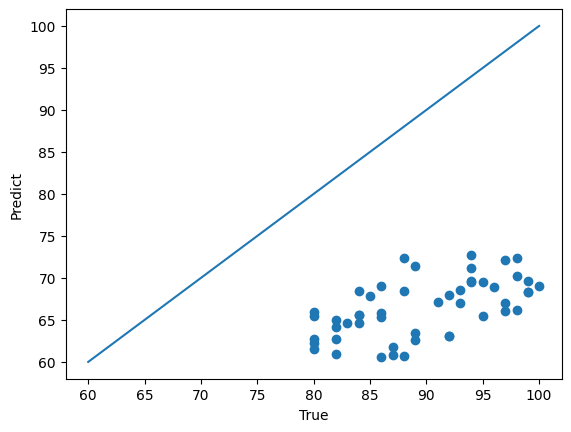

In [30]:
ax = plt.gca()

ax.plot([60, 100], [60, 100])
ax.scatter(outliers['Exam_Score'], fitted.predict(outliers.drop('Exam_Score', axis=1)))

ax.set_ylabel('Predict')
ax.set_xlabel('True')